# Data

https://archive.ics.uci.edu/ml/datasets/Iris
Please download the data to your working folder.On the webpage you can find its description. 

### Explore the data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('./iris.csv')

In [3]:
data.head()

,A,B,C,D,T
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
it = {
    'Iris-setosa': 1,
    'Iris-versicolor': 2,
    'Iris-virginica': 3
}
iris_types = map(lambda t: it[t], data['T'])

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

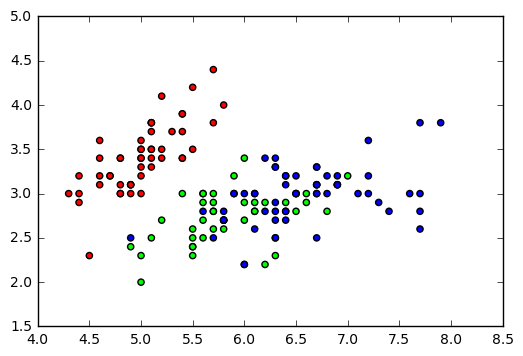

In [7]:
plt.scatter(data['A'], data['B'], c=iris_types, cmap=cmap)
plt.show()

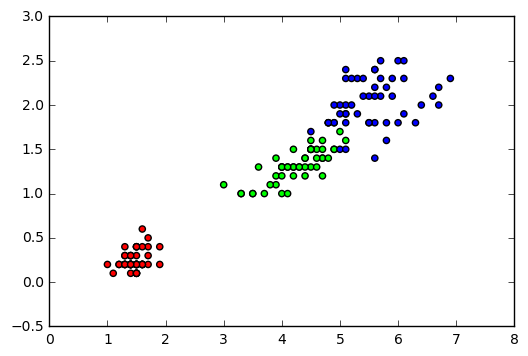

In [8]:
plt.scatter(data['C'], data['D'], c=iris_types, cmap=cmap)
plt.show()

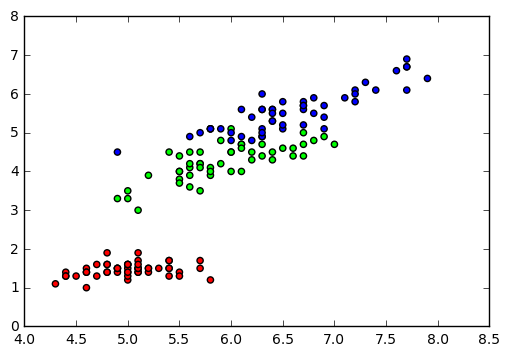

In [9]:
plt.scatter(data['A'], data['C'], c=iris_types, cmap=cmap)
plt.show()

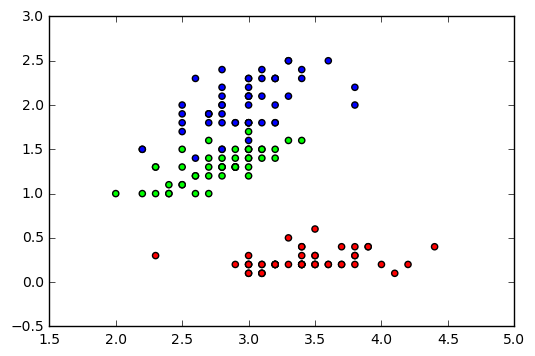

In [10]:
plt.scatter(data['B'], data['D'], c=iris_types, cmap=cmap)
plt.show()    

<IPython.core.display.Javascript object>


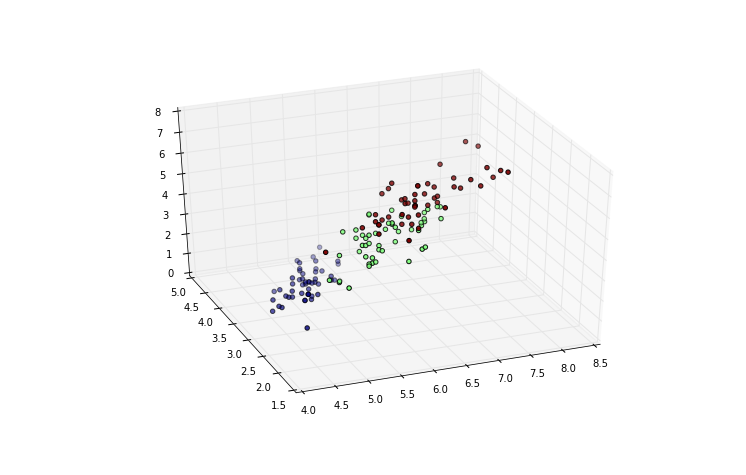

In [28]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
ax = (plt.figure()).add_subplot(111, projection='3d')
ax.scatter(data['A'], data['B'], data['C'], c=iris_types)
plt.show()

In [251]:
data = data.iloc[np.random.permutation(len(data))]
w = data.as_matrix()
print w[:10]
X = np.insert(w[:, :4], 0, 1, axis=1)
Y = np.array(map(lambda t: it[t], (w[:, 4:]).flatten()))
print X[:10], Y[:10]

[[6.0 3.0 4.8 1.8 'Iris-virginica']
 [5.1 3.5 1.4 0.2 'Iris-setosa']
 [5.9 3.2 4.8 1.8 'Iris-versicolor']
 [6.4 2.8 5.6 2.1 'Iris-virginica']
 [6.0 2.2 5.0 1.5 'Iris-virginica']
 [7.2 3.2 6.0 1.8 'Iris-virginica']
 [5.6 2.8 4.9 2.0 'Iris-virginica']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.4 3.2 1.3 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']]
[[1 6.0 3.0 4.8 1.8]
 [1 5.1 3.5 1.4 0.2]
 [1 5.9 3.2 4.8 1.8]
 [1 6.4 2.8 5.6 2.1]
 [1 6.0 2.2 5.0 1.5]
 [1 7.2 3.2 6.0 1.8]
 [1 5.6 2.8 4.9 2.0]
 [1 5.1 3.7 1.5 0.4]
 [1 4.4 3.2 1.3 0.2]
 [1 5.2 3.4 1.4 0.2]] [3 1 2 3 3 3 3 1 1 1]


In [252]:
theta = np.random.uniform(size=(3,5))
theta

array([[ 0.65788759,  0.59275789,  0.27455174,  0.61999895,  0.9156437 ],
       [ 0.14381755,  0.74397814,  0.99911123,  0.85470092,  0.1318587 ],
       [ 0.66414719,  0.86554319,  0.44407076,  0.10572118,  0.09562657]])

In [253]:
X_train, X_validation, X_test = X[:100], X[100: 125], X[125:]
Y_train, Y_validation, Y_test = Y[:100], Y[100: 125], Y[125:]

# Classification

### Implement the "loss" function for Logistic Regression

In [215]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x.astype(float) if hasattr(x, "__len__") else -x))

In [158]:
def h(theta, x):
    return sigmoid(np.dot(x, theta.T))

In [162]:
def loss(x, y, theta):
    p = h(theta, x)
    return (-y.dot(np.log(p)) - (1-y).dot(np.log(1 - p))) / len(y)

In [220]:
def multiclassLoss(x, y, theta):
    l = 0
    for c in range(3):
        Z = y.astype(float) / (c + 1)
        Z[Z != 1] = 0
        l += loss(x, Z, theta[c])
    return l

### Implement the "fit" function gradient descent

In [185]:
def fit(x, y, c, alpha):
    global theta
    diff = np.subtract(h(theta[c], x), y)
    theta[c] = theta[c] - alpha * (x.T).dot(diff) / len(y)

### Implement predict function

In [65]:
def predict(theta, x):
    predictions = np.array([h(theta[i], x) for i in range(3)])
    max_elem = np.max(predictions)
    return np.where(predictions == max_elem)[0][0] + 1

### To evaluate the model, use accuracy, precision and recall metrics

In [277]:
def accuracy(x, y):
    s = sum(np.abs(x - y)) + 0.
    return (len(x) - s) / len(x)

In [278]:
preds = np.array([predict(theta, X[i]) for i in range(len(X))])
accuracy(preds, Y)

0.96666666666666667

### Choose the best learning rate

In [232]:
def learn(alpha):
    print "Learning for alpha: ", alpha
    global theta
    theta = np.random.uniform(size=(3,5))
    for c in range(3):
        Z = Y_train.astype(float) / (c + 1)
        Z[Z != 1] = 0
        for _ in range(30000):
            fit(X_train, Z, c, alpha)

Learning for alpha:  0.4
Learning for alpha:  0.363636363636
Learning for alpha:  0.330578512397
Learning for alpha:  0.300525920361
Learning for alpha:  0.273205382146
Learning for alpha:  0.248368529224
Learning for alpha:  0.225789572022
Learning for alpha:  0.205263247292
Learning for alpha:  0.186602952084
Learning for alpha:  0.169639047349
Learning for alpha:  0.154217315772
Learning for alpha:  0.140197559793
Learning for alpha:  0.127452327084
Learning for alpha:  0.115865751895
Learning for alpha:  0.105332501722
Learning for alpha:  0.0957568197477
Learning for alpha:  0.0870516543161
Learning for alpha:  0.0791378675601
Learning for alpha:  0.0719435159637
Learning for alpha:  0.0654031963306
Learning Rate:  0.0594574512097


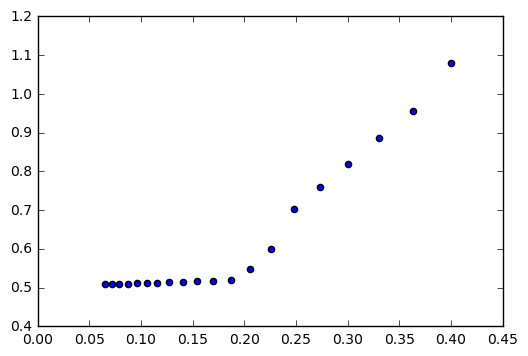

In [254]:
def chooseAlpha(start):
    l = 65000
    for _ in range(20):
        learn(start)
        t = multiclassLoss(X_validation, Y_validation, theta)
        plt.scatter(start, t)
#         if (t > l):
#             break
        l = t
        start /= 1.1
    return start

alpha = chooseAlpha(0.4)
print "Learning Rate: ", alpha
plt.show()

In [284]:
# from the plot we see that the best learning rate is around 0.2
alpha = 0.2

### Plot loss output depending on iteration

In [281]:
theta = np.random.uniform(size=(3,5))
def iterate():
    for c in range(3):
        Z = Y_train.astype(float) / (c + 1)
        Z[Z != 1] = 0
        fit(X_train, Z, c, alpha)
    return multiclassLoss(X_train, Y_train, theta)

losses = [iterate() for i in range(6000)]

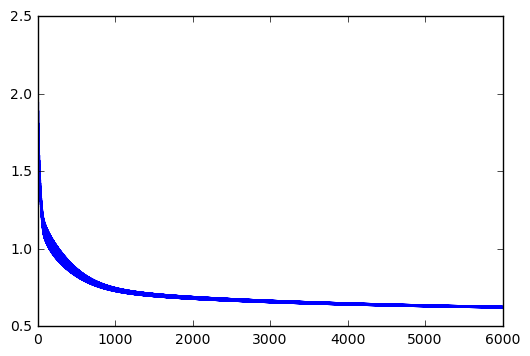

In [282]:
plt.plot(losses)
plt.show()

### Report the prediction accuracy on test data

In [283]:
learn(alpha)
preds = np.array([predict(theta, X_test[i]) for i in range(len(X_test))])
accuracy(preds, Y_test)

Learning for alpha:  0.2


0.95999999999999996

## Clustering

### Implement the K-means algorithm

In [ ]:
X_kTrain, X_kTest = X[:125, 1:], X[125:, 1:]

In [315]:
def dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [339]:
def getClosestCluster(x, clusters):
    dists = np.array([dist(x, cluster) for cluster in clusters])
    min_dist = np.min(dists)
    return np.where(dists == min_dist)[0][0]

In [450]:
def Kmeans(K):
    index_arr = np.arange(len(X_kTrain))
    np.random.shuffle(index_arr)
    ccenters = X_kTrain[index_arr[:K]]

    for _ in range(20):
        sums = np.zeros((K, 4))
        qty = np.zeros(K)
        for p in X_kTrain:
            c = getClosestCluster(p, ccenters)
            sums[c] = sums[c] + p
            qty[c] += 1
        for i in range(K):
            ccenters[i] = sums[i] / qty[i]
    return ccenters

In [444]:
def KmeansErr(x, clusters):
    err = 0
    for p in x:
        c = getClosestCluster(p, clusters)
        err += np.sum((p - clusters[c]) ** 2)
    return np.sqrt(err) / len(x)

### Choose the best-K, using the elbow method 

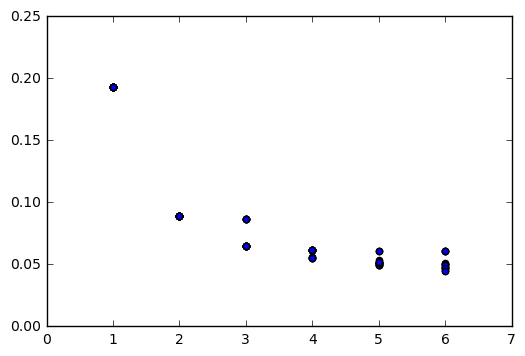

In [482]:
for _ in range(20):
    for k in range(1, 7):
        plt.scatter(k, KmeansErr(X_kTrain, Kmeans(k)))
plt.show()

In [511]:
# We see that error hardly differs after k = 3, so our model has found three clusters as it is given in data

### See whether the clustering algorithm really captures the underying data distribution by assigning labels to each cluster and comaring with ground truth

In [498]:
clus = Kmeans(3)
freq = np.zeros(3)
for p in X[:, 1:]:
    c = getClosestCluster(p, clus)
    freq[c] += 1
print freq

[ 50.  65.  35.]


In [509]:
preK = np.array([getClosestCluster(X[i][1: ], clus) for i in range(len(X))])
www = np.append(preK, Y)
www.shape = (2, 150)
www

array([[1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2,
        0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1,
        2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
        2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 0],
       [3, 1, 2, 3, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 3, 3, 2, 2, 2, 3, 3,
        1, 1, 3, 2, 3, 2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 2, 3, 2, 1, 1, 1, 3,
        1, 1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 3, 3, 1, 2, 2, 1, 1, 2, 1, 2, 1,
        1, 2, 2, 2, 1, 3, 2, 1, 1, 2, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 2,
        3, 1, 2, 3, 2, 3, 1, 3, 2, 2, 1, 3, 3, 1, 3, 1, 2, 1, 2, 1, 1, 1,
        1, 1, 2, 1, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3,
        3, 3, 3, 1, 2, 3, 2, 3, 2, 1, 3, 3, 2, 3,

In [510]:
# as we see from result the members of first class mainly are separable from rest of data
# the second and third are interconnected and in many cases it's hard to separate them
# so our model gave the same result as we saw on plots